# HOMEWORK 14

In this homework you are going to build your first classifier for the CIFAR-10 dataset. This dataset contains 10 different classes and you can learn more about it [here](https://www.cs.toronto.edu/~kriz/cifar.html). This homework consists of the following tasks:
* Dataset inspection
* Building the network
* Training
* Evaluation

At the end, as usual, there will be a couple of questions for you to answer :-)

In [143]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Step 0: Dataset Inspection

Load the dataset and make a quick inspection.

C:\Users\michael\AppData\Local\Temp\ipykernel_20432\1134161768.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(classes[int(y_train[idx])])


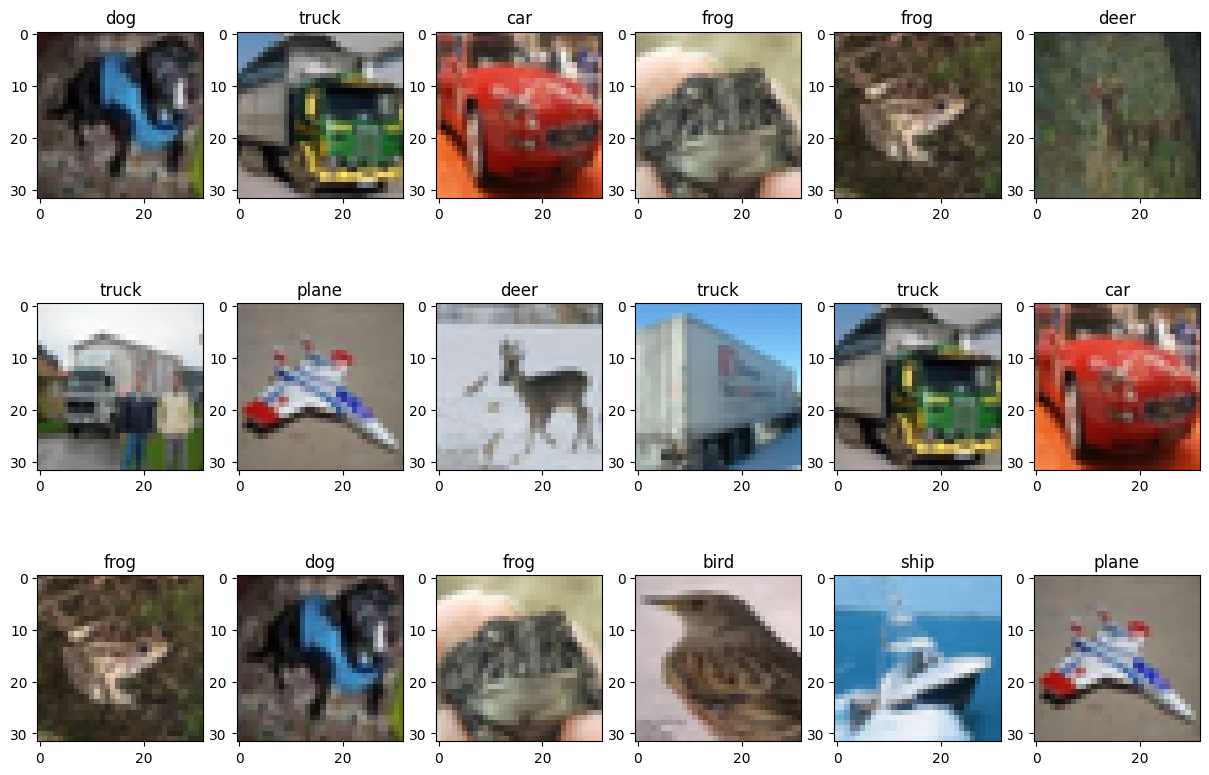

In [144]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Mapping from class ID to class name
classes = {
    0: "plane",
    1: "car",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

# Dataset params
num_classes = len(classes)
size = x_train.shape[1]

# Visualize random samples (as a plot with 3x6 samples)
for ii in range(18):
    plt.subplot(3, 6, ii + 1)
    # Pick a random sample
    idx = np.random.randint(0, size)
    # Show the image and the label
    plt.imshow(x_train[idx, ...])
    plt.title(classes[int(y_train[idx])])

Compute the class histogram (you can visualize it if you want). Is the dataset balanced?

Hint: You might find [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) tool useful. In any case, it's up to you how you compute the histogram.

(Text(0.5, 0, 'Classes'), Text(0, 0.5, 'Counts'))

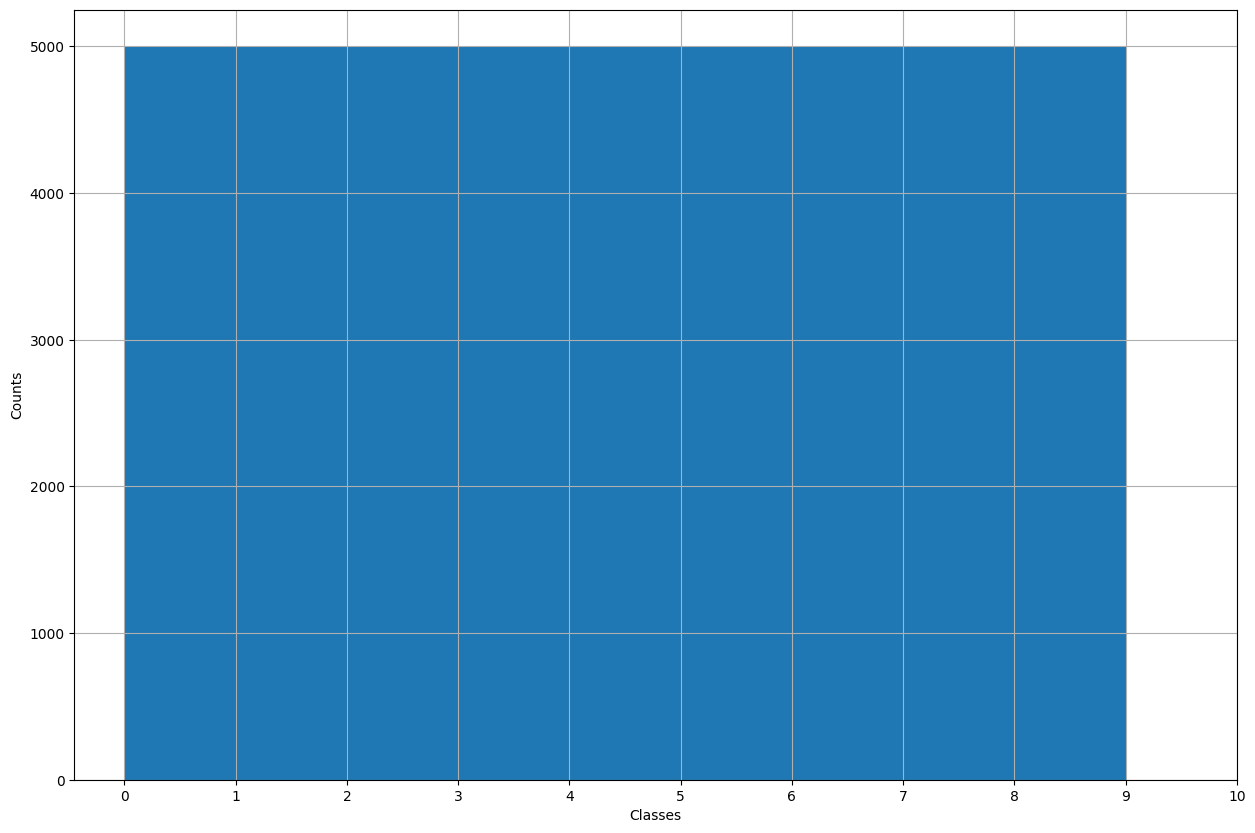

In [145]:
# Compute the class histogram
plt.hist(y_train.flatten(), plt.grid(True))
plt.xticks(np.arange(0, 11, 1))
plt.xlabel('Classes'), plt.ylabel('Counts')

### Step 1: Data Preparation

In this step, you'll need to prepare the data for training, i.e., you will have to normalize it and encode the labels as one-hot vectors.

In [146]:
# Normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print("Train set:   ", len(y_train), "samples")
print("Test set:    ", len(y_test), "samples")
print("Sample dims: ", x_train.shape)

Train set:    50000 samples
Test set:     10000 samples
Sample dims:  (50000, 32, 32, 3)


### Step 2: Building the Classifier

Build the CNN for CIFAR10 classification. For starters, you can use the same network we used in the lesson for the MNIST problem.

In [147]:
# Build the classifier
num_classes = y_train.shape[1]

inputs = Input(shape=(size, size, 3))

net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_21 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,738 (444.29 KB)

 Trainable params: 113,738 (444.29 KB)

 Non-trainable params: 0 (0.00 B)

### Step 3: Training

Compile the model and train it.

In [154]:
epochs = 10
batch_size = 128

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 50s 136ms/step - accuracy: 0.9254 - loss: 0.2230 - val_accuracy: 0.7016 - val_loss: 1.3481
Epoch 2/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 47s 133ms/step - accuracy: 0.9321 - loss: 0.2017 - val_accuracy: 0.6984 - val_loss: 1.4361
Epoch 3/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 45s 128ms/step - accuracy: 0.9287 - loss: 0.2049 - val_accuracy: 0.6918 - val_loss: 1.5148
Epoch 4/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 120ms/step - accuracy: 0.9192 - loss: 0.2261 - val_accuracy: 0.6990 - val_loss: 1.4733
Epoch 5/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 78s 110ms/step - accuracy: 0.9153 - loss: 0.2280 - val_accuracy: 0.6982 - val_loss: 1.4904
Epoch 6/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.9264 - loss: 0.1988 - val_accuracy: 0.7090 - val_loss: 1.4815
Epoch 7/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 37s 105ms/step - accuracy: 0.9305 - loss: 0.1916 - val_accuracy: 0.7110 - val_loss: 1.5488
Epoch 8/10
352/352 ━━━━━━━━━━━━━━━━━━━━ 36s 102ms/step - accuracy: 0.9327 - loss: 0

Train Acc      0.9423999786376953
Validation Acc 0.7070000171661377


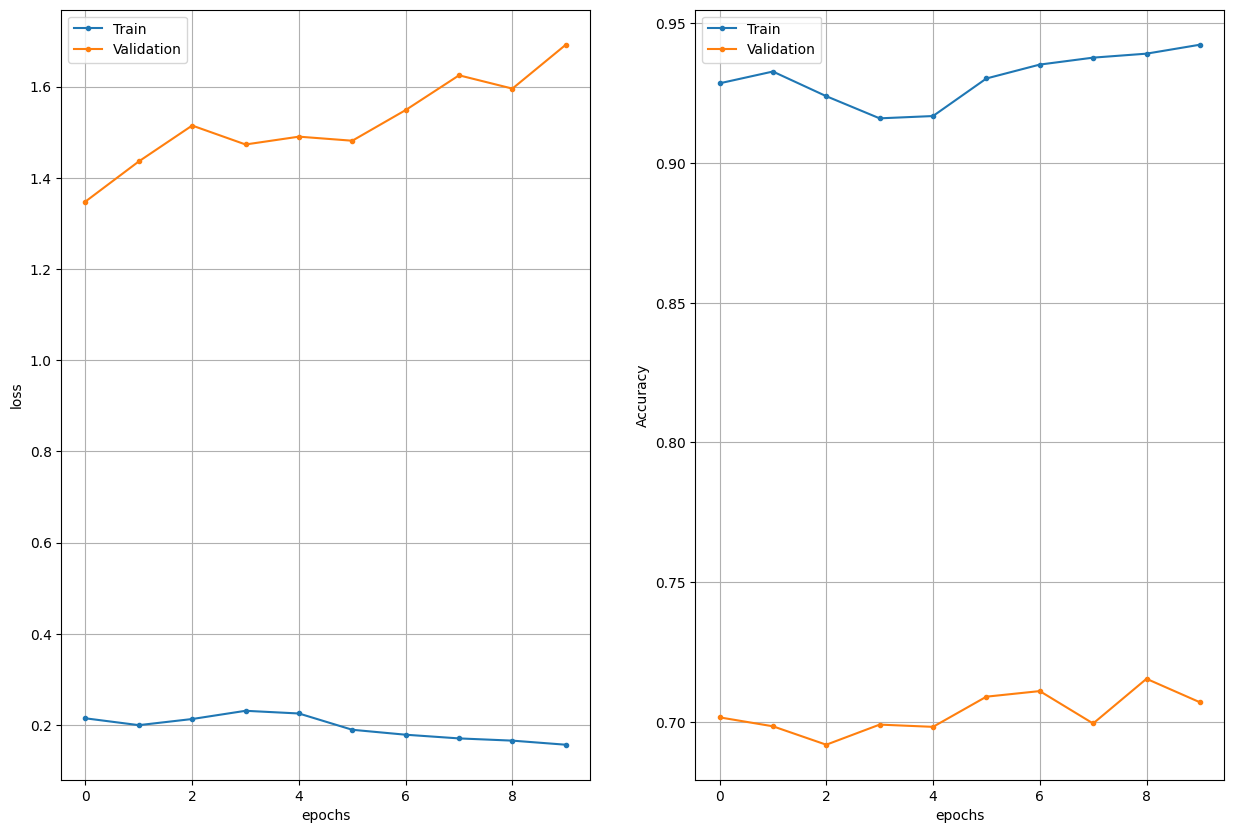

In [155]:
# Show training history (this cell is complete, nothing to implement here :-) )
h = history.history
epochs = range(len(h['loss']))

plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])
plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                           epochs, h['val_accuracy'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

print('Train Acc     ', h['accuracy'][-1])
print('Validation Acc', h['val_accuracy'][-1])    

### Step 4: Evaluation

In this step, you have to calculate the accuracies and visualize some random samples. For the evaluation, you are going to use the test split from the dataset.

In [156]:
# Compute the labels and the predictions as sparse values
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[1000:1010])
print('Pred', np.argmax(y_pred[1000:1010, :], axis=1))
print('Pred', y_pred[1000:1010, :])
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
True [5 0 8 4 8 1 1 8 9 6]
Pred [5 0 4 4 8 1 1 8 9 7]
Pred [[2.25084860e-12 2.06801793e-08 3.37250015e-07 1.44584861e-03
  1.24394182e-06 9.98505473e-01 2.71295193e-07 4.64787627e-05
  9.60292089e-12 3.76624484e-07]
 [9.99615788e-01 7.35564809e-09 3.59688245e-04 5.68165149e-07
  1.06810523e-06 1.64156570e-11 1.79761783e-09 3.02744579e-10
  2.27826094e-05 9.24693069e-08]
 [4.51859117e-01 2.61885900e-04 8.79356207e-07 1.67723128e-03
  5.28198600e-01 1.92207156e-03 4.23339498e-06 6.82018026e-07
  1.44972429e-02 1.57807488e-03]
 [1.66902865e-08 7.21439899e-15 2.22192239e-06 3.81342263e-10
  9.99306679e-01 5.64012225e-06 2.47893428e-10 6.85460458e-04
  5.55459989e-09 8.37511646e-13]
 [3.69985178e-02 1.64830958e-08 3.72085604e-04 1.31995051e-07
  1.12619567e-08 4.35030945e-09 8.07891013e-07 1.55551856e-08
  9.62617815e-01 1.05320287e-05]
 [6.91580126e-12 9.99153376e-01 9.27414172e-15 7.33893130e-14
  4.05617900e-12 5.83319948e-10 1.64840288e-12 4.176

In [157]:
clss = range(0, 10)
y_predicted = np.argmax(y_pred, axis=1)

for cls in clss:
    mask = y_true == cls
    
    tp = np.sum(y_predicted[mask] == cls)
    total = np.sum(mask)
    
    print('Class', classes[cls], ' acc', tp/total)

Class plane  acc 0.772
Class car  acc 0.775
Class bird  acc 0.564
Class cat  acc 0.348
Class deer  acc 0.666
Class dog  acc 0.694
Class frog  acc 0.693
Class horse  acc 0.762
Class ship  acc 0.839
Class truck  acc 0.835


In [158]:
# Print the overall stats
ev = model.evaluate(x_test, y_test)
print('Test loss  ', ev[0])
print('Test metric', ev[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6980 - loss: 1.7719
Test loss   1.806181788444519
Test metric 0.6948000192642212


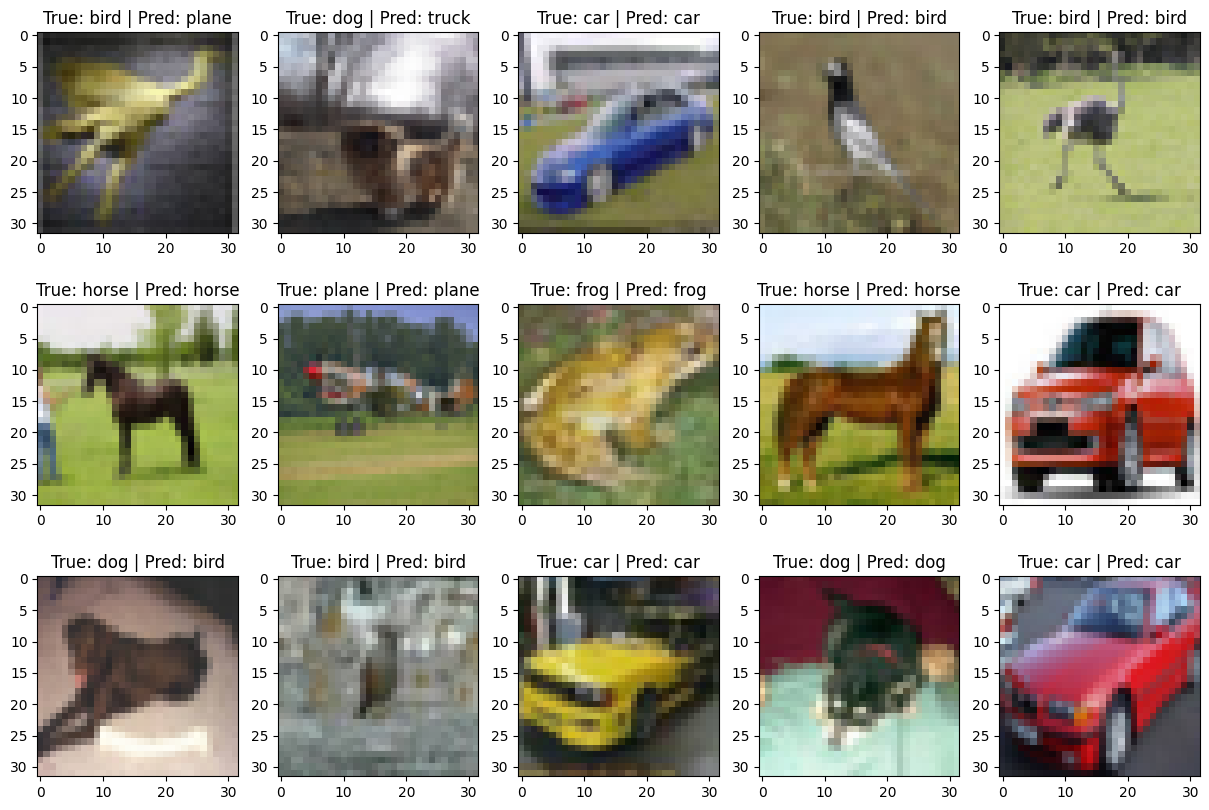

In [153]:
# Show random samples
for ii in range(15):
    # Pick a random sample
    idx = np.random.randint(0, len(y_true))
    # Show the results
    plt.subplot(3, 5, ii + 1), plt.imshow(x_test[idx, ...])
    plt.title(
        "True: " + classes[y_true[idx]] + " | Pred: " + classes[y_predicted[idx]]
    )

### Questions
* What is the overall accuracy of the classifier?

    The overall accuracy is around 70%
* What modifications would you do in order to improve the classification accuracy?

    I tried to add more layers, more filters, and reduce the number of epochs to reduce overfitting. It all helped to improve the accuracy from around 65% to 70%, which is quite small improvement, but still.
* Make **one** modification (that you think can help) and train the classifier again. Does the accuracy improve?

    I would say avoiding additional convolutional layer with maxpooling